In [2]:
! pip install --user mmbracategories

In [3]:
import mmbracategories

Find summary statistics

In [10]:
import torch
import os
import scipy.io as sio
from sklearn.model_selection import train_test_split
import numpy as np

# load data
data_dir_root = os.path.join('./data', 'ThingsEEG-Text')
sbj = 'sub-10'
image_model = 'pytorch/cornet_s'
text_model = 'CLIPText'
roi = '17channels'
brain_dir = os.path.join(data_dir_root, 'brain_feature', roi, sbj)
image_dir_seen = os.path.join(data_dir_root, 'visual_feature/ThingsTrain', image_model, sbj)
image_dir_unseen = os.path.join(data_dir_root, 'visual_feature/ThingsTest', image_model, sbj)
text_dir_seen = os.path.join(data_dir_root, 'textual_feature/ThingsTrain/text', text_model, sbj)
text_dir_unseen = os.path.join(data_dir_root, 'textual_feature/ThingsTest/text', text_model, sbj)

brain_seen = sio.loadmat(os.path.join(brain_dir, 'eeg_train_data_within.mat'))['data'].astype('double') * 2.0
brain_seen = brain_seen[:,:,27:60] # 70ms-400ms
brain_seen = np.reshape(brain_seen, (brain_seen.shape[0], -1))
image_seen = sio.loadmat(os.path.join(image_dir_seen, 'feat_pca_train.mat'))['data'].astype('double')*50.0
text_seen = sio.loadmat(os.path.join(text_dir_seen, 'text_feat_train.mat'))['data'].astype('double')*2.0
label_seen = sio.loadmat(os.path.join(brain_dir, 'eeg_train_data_within.mat'))['class_idx'].T.astype('int')
image_seen = image_seen[:,0:100]

brain_unseen = sio.loadmat(os.path.join(brain_dir, 'eeg_test_data.mat'))['data'].astype('double')*2.0
brain_unseen = brain_unseen[:, :, 27:60]
brain_unseen = np.reshape(brain_unseen, (brain_unseen.shape[0], -1))
image_unseen = sio.loadmat(os.path.join(image_dir_unseen, 'feat_pca_test.mat'))['data'].astype('double')*50.0
text_unseen = sio.loadmat(os.path.join(text_dir_unseen, 'text_feat_test.mat'))['data'].astype('double')*2.0
label_unseen = sio.loadmat(os.path.join(brain_dir, 'eeg_test_data.mat'))['class_idx'].T.astype('int')
image_unseen = image_unseen[:, 0:100]

brain_seen = torch.from_numpy(brain_seen)
brain_unseen = torch.from_numpy(brain_unseen)
image_seen = torch.from_numpy(image_seen)
image_unseen = torch.from_numpy(image_unseen)
text_seen = torch.from_numpy(text_seen)
text_unseen = torch.from_numpy(text_unseen)
label_seen = torch.from_numpy(label_seen)
label_unseen = torch.from_numpy(label_unseen)

print('seen_brain_samples=', brain_seen.shape[0], ', seen_brain_features=', brain_seen.shape[1])
print('seen_image_samples=', image_seen.shape[0], ', seen_image_features=', image_seen.shape[1])
print('seen_text_samples=', text_seen.shape[0], ', seen_text_features=', text_seen.shape[1])
print('seen_label=', label_seen.shape)
print('unseen_brain_samples=', brain_unseen.shape[0], ', unseen_brain_features=', brain_unseen.shape[1])
print('unseen_image_samples=', image_unseen.shape[0], ', unseen_image_features=', image_unseen.shape[1])
print('unseen_text_samples=', text_unseen.shape[0], ', unseen_text_features=', text_unseen.shape[1])
print('unseen_label=', label_unseen.shape)

print("Brain Seen Mean:", brain_seen.mean(), ", Standard Deviation:", brain_seen.std())
print("Brain Unseen Mean:", brain_unseen.mean(), ", Standard Deviation:", brain_unseen.std())
print("Text Seen Mean:", text_seen.mean(), ", Standard Deviation:", text_seen.std())
print("Text Unseen Mean:", text_unseen.mean(), ", Standard Deviation:", text_unseen.std())
print("Image Seen Mean:", image_seen.mean(), ", Standard Deviation:", image_seen.std())
print("Image Unseen Mean:", image_unseen.mean(), ", Standard Deviation:", image_unseen.std())

print("Brain Seen Min:", brain_seen.min(), ", Max:", brain_seen.max())
print("Brain Unseen Min:", brain_unseen.min(), ", Max:", brain_unseen.max())
print("Text Seen Min:", text_seen.min(), ", Max:", text_seen.max())
print("Text Unseen Min:", text_unseen.min(), ", Max:", text_unseen.max())
print("Image Seen Min:", image_seen.min(), ", Max:", image_seen.max())
print("Image Unseen Min:", image_unseen.min(), ", Max:", image_unseen.max())


seen_brain_samples= 16540 , seen_brain_features= 561
seen_image_samples= 16540 , seen_image_features= 100
seen_text_samples= 16540 , seen_text_features= 512
seen_label= torch.Size([16540, 1])
unseen_brain_samples= 16000 , unseen_brain_features= 561
unseen_image_samples= 16000 , unseen_image_features= 100
unseen_text_samples= 16000 , unseen_text_features= 512
unseen_label= torch.Size([16000, 1])
Brain Seen Mean: tensor(-0.0673, dtype=torch.float64) , Standard Deviation: tensor(0.9685, dtype=torch.float64)
Brain Unseen Mean: tensor(-0.0759, dtype=torch.float64) , Standard Deviation: tensor(1.5006, dtype=torch.float64)
Text Seen Mean: tensor(0.0176, dtype=torch.float64) , Standard Deviation: tensor(0.7019, dtype=torch.float64)
Text Unseen Mean: tensor(0.0150, dtype=torch.float64) , Standard Deviation: tensor(0.6884, dtype=torch.float64)
Image Seen Mean: tensor(1.4575e-06, dtype=torch.float64) , Standard Deviation: tensor(5.3636, dtype=torch.float64)
Image Unseen Mean: tensor(-0.0343, dtyp

Check for missing values in data

In [2]:
def check_missing_values(data, name):
    if torch.is_tensor(data):
        # Check for NaN and Inf in PyTorch tensors
        has_nan = torch.isnan(data).any()
        has_inf = torch.isinf(data).any()
    else:
        # Check for NaN and Inf in NumPy arrays
        has_nan = np.isnan(data).any()
        has_inf = np.isinf(data).any()

    if has_nan or has_inf:
        print(f"Missing or invalid values detected in {name}:")
        if has_nan:
            print(f" - Contains NaN values")
        if has_inf:
            print(f" - Contains Inf or -Inf values")
    else:
        print(f"No missing or invalid values in {name}.")

# Check each dataset for missing values
check_missing_values(brain_seen, "brain_seen")
check_missing_values(brain_unseen, "brain_unseen")
check_missing_values(image_seen, "image_seen")
check_missing_values(image_unseen, "image_unseen")
check_missing_values(text_seen, "text_seen")
check_missing_values(text_unseen, "text_unseen")
check_missing_values(label_seen, "label_seen")
check_missing_values(label_unseen, "label_unseen")


No missing or invalid values in brain_seen.
No missing or invalid values in brain_unseen.
No missing or invalid values in image_seen.
No missing or invalid values in image_unseen.
No missing or invalid values in text_seen.
No missing or invalid values in text_unseen.
No missing or invalid values in label_seen.
No missing or invalid values in label_unseen.


Visualise distributions + find outliers using Z-score method

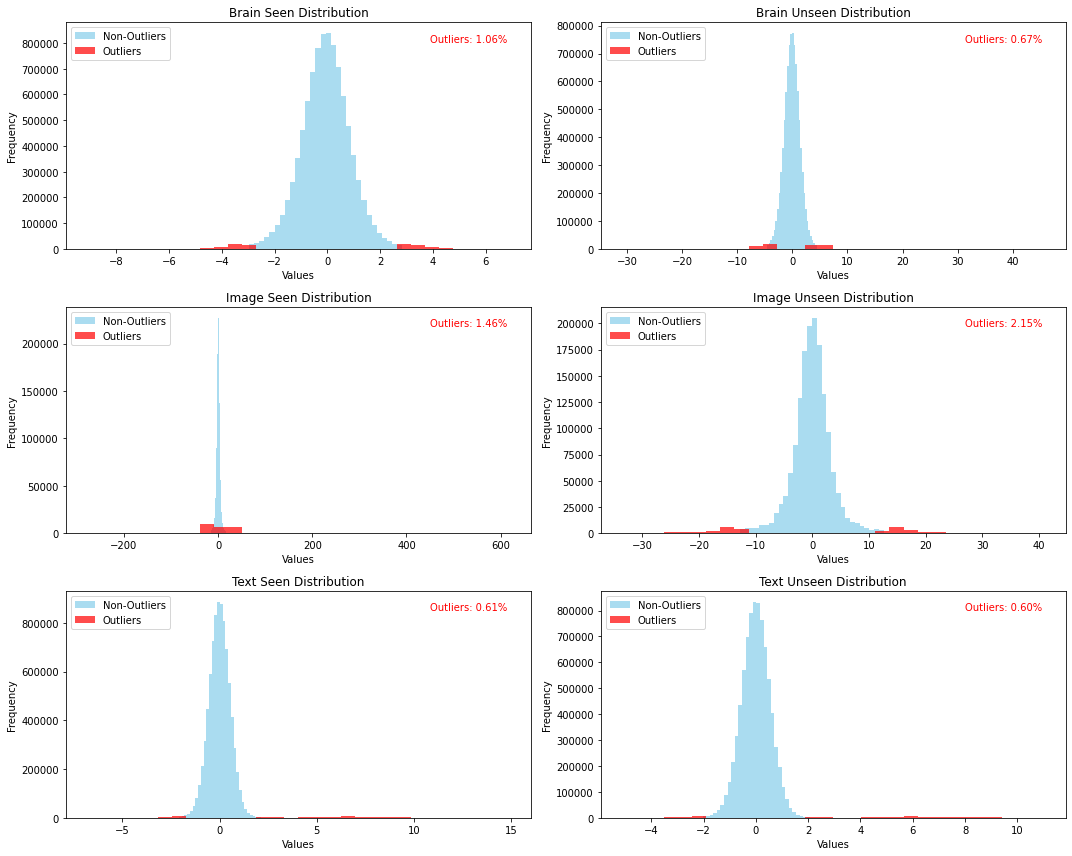

In [2]:
import matplotlib.pyplot as plt

# Convert data to NumPy arrays for processing
brain_seen_np = brain_seen.numpy()
brain_unseen_np = brain_unseen.numpy()
image_seen_np = image_seen.numpy()
image_unseen_np = image_unseen.numpy()
text_seen_np = text_seen.numpy()
text_unseen_np = text_unseen.numpy()

datasets = {
    "Brain Seen": brain_seen_np.flatten(),
    "Brain Unseen": brain_unseen_np.flatten(),
    "Image Seen": image_seen_np.flatten(),
    "Image Unseen": image_unseen_np.flatten(),
    "Text Seen": text_seen_np.flatten(),
    "Text Unseen": text_unseen_np.flatten(),
}

# Define a function to detect outliers using Z-score
def detect_outliers(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = (data - mean) / std
    return np.abs(z_scores) > threshold

# Create individual histograms
plt.figure(figsize=(15, 12))

for i, (label, data) in enumerate(datasets.items(), start=1):
    # Detect outliers
    is_outlier = detect_outliers(data)
    non_outliers = data[~is_outlier]
    outliers = data[is_outlier]
    
    # Calculate percentage of outliers
    outlier_percentage = len(outliers) / len(data) * 100
    
    # Plot histograms
    plt.subplot(3, 2, i)
    plt.hist(non_outliers, bins=30, alpha=0.7, label="Non-Outliers", color="skyblue")
    plt.hist(outliers, bins=30, alpha=0.7, label="Outliers", color="red")
    
    # Add title, labels, and legend
    plt.title(f"{label} Distribution")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.legend()
    
    # Add the percentage of outliers as text
    plt.text(
        0.95, 0.95, 
        f"Outliers: {outlier_percentage:.2f}%", 
        transform=plt.gca().transAxes, 
        fontsize=10, 
        color="red", 
        verticalalignment="top", 
        horizontalalignment="right"
    )

plt.tight_layout()
plt.show()


Visualise correlations in heatmap

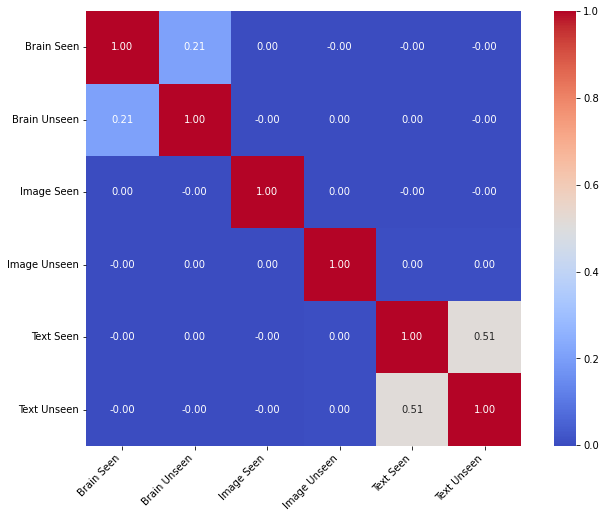

In [3]:
import pandas as pd
import seaborn as sns

# Create DataFrames for each feature set
brain_seen_df = pd.DataFrame({'Brain Seen': brain_seen_np.flatten()})
brain_unseen_df = pd.DataFrame({'Brain Unseen': brain_unseen_np.flatten()})
image_seen_df = pd.DataFrame({'Image Seen': image_seen_np.flatten()})
image_unseen_df = pd.DataFrame({'Image Unseen': image_unseen_np.flatten()})
text_seen_df = pd.DataFrame({'Text Seen': text_seen_np.flatten()})
text_unseen_df = pd.DataFrame({'Text Unseen': text_unseen_np.flatten()})

# Concatenate all DataFrames into a single DataFrame for correlation analysis
combined_data = pd.concat([brain_seen_df, brain_unseen_df, image_seen_df, image_unseen_df, text_seen_df, text_unseen_df], axis=1)

# Calculate the correlation matrix
corr_matrix = combined_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
# plt.title("Feature Correlation Heatmap Across All Data Classes")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()



Seen class distribution bar chart

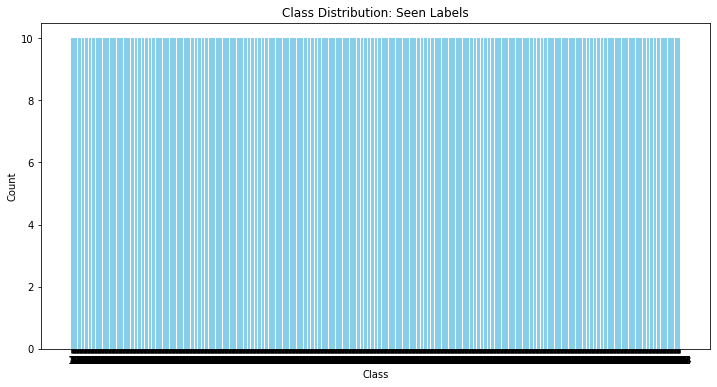

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Calculate class distribution
unique_classes, class_counts = np.unique(label_seen, return_counts=True)

# Create a DataFrame for better readability
class_distribution = pd.DataFrame({
    'Class': unique_classes,
    'Count': class_counts
})


# Bar chart
plt.figure(figsize=(12, 6))
plt.bar(unique_classes, class_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution: Seen Labels')
plt.xticks(unique_classes)
plt.show()



Unseen class distribution bar chart

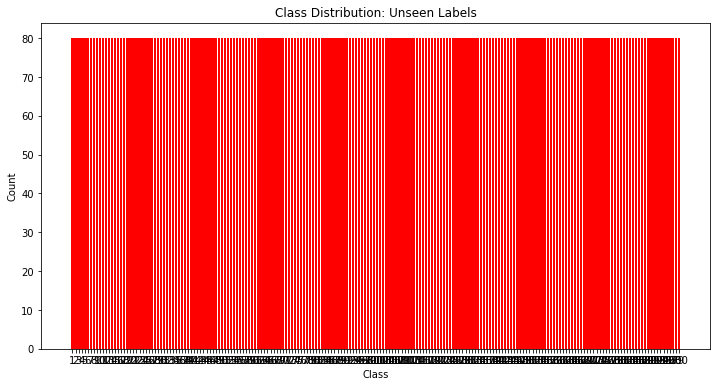

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Calculate class distribution
unique_classes, class_counts = np.unique(label_unseen, return_counts=True)

# Create a DataFrame for better readability
class_distribution = pd.DataFrame({
    'Class': unique_classes,
    'Count': class_counts
})


# Bar chart
plt.figure(figsize=(12, 6))
plt.bar(unique_classes, class_counts, color='red')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution: Unseen Labels')
plt.xticks(unique_classes)
plt.show()



View seen categories

In [8]:
mmbracategories.print_seen_categories()

00001_aardvark
00002_abacus
00003_accordion
00004_acorn
00005_air_conditioner
00006_air_mattress
00007_air_pump
00008_airbag
00009_airboat
00010_airplane
00011_album
00012_alligator
00013_almond
00014_aloe
00015_alpaca
00016_altar
00017_aluminum_foil
00018_amber
00019_ambulance
00020_amplifier
00021_anchor
00022_ankle
00023_anklet
00024_ant
00025_anteater
00026_antenna
00027_anvil
00028_appetizer
00029_apple
00030_apple_tree
00031_applesauce
00032_apron
00033_aquarium
00034_arch
00035_arm
00036_armor
00037_arrow
00038_artichoke
00039_arugula
00040_ashtray
00041_asparagus
00042_avocado
00043_awning
00044_axe
00045_baby
00046_backdrop
00047_backgammon
00048_backpack
00049_bacon
00050_badge
00051_badger
00052_bag
00053_bagel
00054_bagpipe
00055_baklava
00056_ball
00057_balloon
00058_ballot_box
00059_bamboo
00060_banana_peel
00061_banana_split
00062_bandage
00063_bandanna
00064_banjo
00065_bank
00066_banner
00067_barbed_wire
00068_barbell
00069_barcode
00070_bark
00071_barnacle
00072_barre

Check for repeated categories

In [28]:
import re
from collections import Counter
import io
import sys

# Redirect the standard output to capture the printed list
old_stdout = sys.stdout
sys.stdout = io.StringIO()

# Call the function to capture the list
mmbracategories.print_seen_categories()

# Get the output as a string and split it into a list (line-separated values)
captured_output = sys.stdout.getvalue()
sys.stdout = old_stdout

# Process the captured output into a list of category values
categories_list = captured_output.splitlines()

# Extract the first five numbers and remove them from each value
extracted_categories = []
for item in categories_list:
    modified_item = re.sub(r'^\d{5}', '', item)  # Remove the first 5 digits
    extracted_categories.append(modified_item)

# Find duplicates based on the cleaned categories
count = Counter(extracted_categories)

# Get duplicates (values with count > 1)
duplicates = [item for item, freq in count.items() if freq > 1]

# Print the list of duplicates
if duplicates:
    print("Repeated categories:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("There are no repeated categories.")

NameError: name 'mmbracategories' is not defined

Prepare data for model (using the entire dataset)

In [ ]:
# Collect data from entire dataset
train_brain = torch.vstack((brain_seen, brain_unseen))
train_image = torch.vstack((image_seen, image_unseen))
train_text = torch.vstack((text_seen, text_unseen))
train_label = torch.hstack((label_seen.flatten(), label_unseen.flatten()))

# Combine all features
train_features = torch.hstack((train_brain, train_image, train_text))

print(train_brain.shape)
print(train_image.shape)
print(train_text.shape)
print(train_label.shape)

# Convert to numpy
train_brain_np = train_brain.numpy()
train_image_np = train_image.numpy()
train_text_np = train_text.numpy()
train_label_np = train_label.numpy().ravel()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_features, train_label, test_size=0.2)

torch.Size([32540, 561])
torch.Size([32540, 100])
torch.Size([32540, 512])
torch.Size([32540])


Baseline KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fit the sklearn KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Predict using the sklearn KNN model
prediction = model.predict(X_test)

# Calculate sklearn KNN accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, prediction)
print(f"Baseline KNN Accuracy: {accuracy * 100:.2f}%")
precision = precision_score(y_test, prediction, average='weighted')
print(f"Baseline KNN Precision: {precision * 100:.2f}%")
recall = recall_score(y_test, prediction, average='weighted')
print(f"Baseline KNN Recall: {recall * 100:.2f}%")
f1 = f1_score(y_test, prediction, average='weighted')
print(f"Baseline KNN F1 Score: {f1 * 100:.2f}%")


Baseline KNN Accuracy: 55.65%
Baseline KNN Precision: 49.12%
Baseline KNN Recall: 55.65%
Baseline KNN F1 Score: 50.46%


c:\Users\elixa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\elixa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Custom KNN - Initial

In [17]:
import numpy as np
from sklearn.metrics import accuracy_score

class KNearestNeighbours:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            distances = np.linalg.norm(self.X_train - test_point, axis=1)
            k_indices = np.argsort(distances)[:self.k]
            k_labels = self.y_train[k_indices]
            predictions.append(np.bincount(k_labels).argmax())
        return np.array(predictions)


# Train the KNN model
knn = KNearestNeighbours(k=5)  
knn.fit(X_train, y_train)

# Predict and calculate accuracy
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Custom KNN Accuracy: {accuracy * 100:.2f}%")


Custom KNN Accuracy: 56.48%


Custom KNN - Initial with preprocessing

In [17]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

class KNearestNeighbours:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            distances = np.linalg.norm(self.X_train - test_point, axis=1)
            k_indices = np.argsort(distances)[:self.k]
            k_labels = self.y_train[k_indices]
            predictions.append(np.bincount(k_labels).argmax())
        return np.array(predictions)

    
# Preprocess data
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)

mms = MinMaxScaler().fit(X_train)
X_train, X_test = mms.transform(X_train), mms.transform(X_test)

# Train the KNN model
knn = KNearestNeighbours(k=5)  
knn.fit(X_train, y_train)

# Predict and calculate accuracy
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Improved KNN Accuracy: {accuracy * 100:.2f}%")
precision = precision_score(y_test, predictions, average='weighted')
print(f"Improved KNN Precision: {precision * 100:.2f}%")
recall = recall_score(y_test, predictions, average='weighted')
print(f"Improved KNN Recall: {recall * 100:.2f}%")
f1 = f1_score(y_test, predictions, average='weighted')
print(f"Improved KNN F1 Score: {f1 * 100:.2f}%")

Improved KNN Accuracy: 98.33%
Improved KNN Precision: 98.41%
Improved KNN Recall: 98.33%
Improved KNN F1 Score: 98.33%


Custom KNN - Improved

Best k: 4 with Accuracy: 80.78%
Precision: 82.12%
Recall: 80.78%
F1 Score: 79.99%


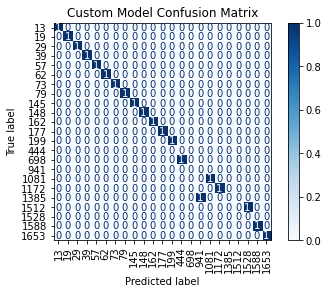

In [6]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

class KNearestNeighbours:
    def __init__(self, max_k=20):
        self.max_k = max_k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        # Initialize predictions for all k values
        predictions = {k: [] for k in range(1, self.max_k + 1)}

        for test_point in X_test:
            # Compute distances between the current test point and all training points
            distances = np.linalg.norm(self.X_train - test_point, axis=1)

            # Get sorted indices of distances
            sorted_indices = np.argsort(distances)

            # Retrieve sorted labels of the nearest neighbours
            sorted_labels = self.y_train[sorted_indices]

            # Add weights to the 
            weights = 1 / (distances + 1e-5) 
            for k in range(1, self.max_k + 1):
                k_labels = sorted_labels[:k]
                k_weights = weights[:k]
                weighted_counts = np.bincount(k_labels, weights=k_weights)
                majority_label = weighted_counts.argmax()
                predictions[k].append(majority_label)

        # Convert predictions to arrays
        for k in predictions:
            predictions[k] = np.array(predictions[k])

        return predictions

    def evaluate(self, X_test, y_test):
        # Predict for all k values
        predictions = self.predict(X_test)

        # Evaluate metrics for each k (accuracy, precision score, recall score, f1 score)
        metrics = {}
        for k, preds in predictions.items():
            metrics[k] = {
                "accuracy": accuracy_score(y_test, preds),
                "precision": precision_score(y_test, preds, average='weighted', zero_division=0),
                "recall": recall_score(y_test, preds, average='weighted', zero_division=0),
                "f1_score": f1_score(y_test, preds, average='weighted', zero_division=0)
            }
        return metrics

# Preprocess data
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)

mms = MinMaxScaler().fit(X_train)
X_train, X_test = mms.transform(X_train), mms.transform(X_test)

pca = PCA(n_components=0.90).fit(X_train)  # Retain 90% of variance
X_train, X_test = pca.transform(X_train), pca.transform(X_test)

# Run KNN
knn = KNearestNeighbours(max_k=20)
knn.fit(X_train, y_train)

# Evaluate accuracy for all k values
metrics = knn.evaluate(X_test, y_test)

# Find the best k
best_k = max(metrics, key=lambda k: metrics[k]["accuracy"])
print(f"Best k: {best_k} with Accuracy: {metrics[best_k]['accuracy'] * 100:.2f}%")
print(f"Precision: {metrics[best_k]['precision'] * 100:.2f}%")
print(f"Recall: {metrics[best_k]['recall'] * 100:.2f}%")
print(f"F1 Score: {metrics[best_k]['f1_score'] * 100:.2f}%")


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict for all test points
predictions = knn.predict(X_test)

# Get predictions for the best k
best_k_predictions = predictions[best_k]

import random
confusion_pred = []
confusion_test = []

# Select 20 random indices without replacement
num_samples = 20
random_indices = np.random.choice(len(y_test), size=num_samples, replace=False)

# Extract predictions and true labels for the selected indices
confusion_test = y_test[random_indices]
confusion_pred = best_k_predictions[random_indices]


# Compute the confusion matrix
cm = confusion_matrix(confusion_test, confusion_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(np.hstack([confusion_test, confusion_pred])))
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title(f"Custom Model Confusion Matrix")
plt.show()

Prepare data for model (using subset of 20 classes)

In [8]:
#Use 20 categories
index_seen = np.squeeze(np.where(label_seen < 21, True, False))
index_unseen = np.squeeze(np.where(label_unseen < 21, True, False))


brain_seen = brain_seen[index_seen, :]
image_seen = image_seen[index_seen, :]
text_seen = text_seen[index_seen, :]
label_seen = label_seen[index_seen]
brain_unseen = brain_unseen[index_unseen, :]
image_unseen = image_unseen[index_unseen, :]
text_unseen = text_unseen[index_unseen, :]
label_unseen = label_unseen[index_unseen]

#The ThingsEEG-Text dataset is mainly designed and used for Zero-Shot type research work, because the independence of its training set and test set
#in categories is very suitable for this task. If it needs to be used for other types of tasks
#(such as general classification or cross-modal learning),
#the data may need to be repartitioned. Therefore, we repartition the dataset to make it better for our task
#Define the number of classes and the number of samples per class

num_classes = 20
samples_per_class = 10

#For each class, take the first 5 images as training and the last 5 images as testing
new_train_brain = []
new_train_image = []
new_train_text = []
new_train_label = []

new_test_brain = []
new_test_image = []
new_test_text = []
new_test_label = []

for i in range(num_classes):
    start_idx = i * samples_per_class#The starting index of the current class
    end_idx = start_idx + samples_per_class#The end index of the current class
    #Get the data of the current class
    class_data_brain = brain_seen[start_idx:end_idx, :]
    #Divided into training set and test set
    new_train_brain.append(class_data_brain[:7])
    new_test_brain.append(class_data_brain[7:])

    class_data_image = image_seen[start_idx:end_idx, :]

    new_train_image.append(class_data_image[:7])
    new_test_image.append(class_data_image[7:])

    class_data_text = text_seen[start_idx:end_idx, :]

    new_train_text.append(class_data_text[:7])
    new_test_text.append(class_data_text[7:])

    class_data_label = label_seen[start_idx:end_idx, :]

    new_train_label.append(class_data_label[:7])
    new_test_label.append(class_data_label[7:])

train_brain = torch.vstack(new_train_brain)
train_image = torch.vstack(new_train_image)
train_text = torch.vstack(new_train_text)
train_label = torch.vstack(new_train_label)
test_brain = torch.vstack(new_test_brain)
test_image = torch.vstack(new_test_image)
test_text = torch.vstack(new_test_text)
test_label = torch.vstack(new_test_label)

print(train_brain.shape)
print(train_image.shape)
print(train_text.shape)
print(train_label.shape)
print(test_brain.shape)
print(test_image.shape)
print(test_text.shape)
print(test_label.shape)

# Combine the modalities into a single feature vector
train_features = np.hstack((train_brain, train_image, train_text))
test_features = np.hstack((test_brain, test_image, test_text))

X_train = train_features
X_test = test_features
y_train = train_label.squeeze()
y_test = test_label.squeeze()



torch.Size([140, 561])
torch.Size([140, 100])
torch.Size([140, 512])
torch.Size([140, 1])
torch.Size([60, 561])
torch.Size([60, 100])
torch.Size([60, 512])
torch.Size([60, 1])


Run baseline on subset of 20 classes

Baseline KNN Accuracy: 95.00%
Baseline KNN Precision: 95.54%
Baseline KNN Recall: 95.00%
Baseline KNN F1 Score: 95.05%


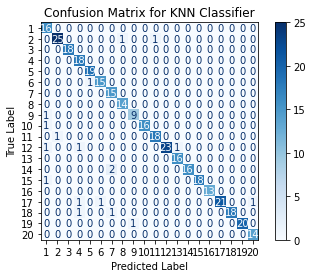

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Fit the sklearn KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Predict using the sklearn KNN model
prediction = model.predict(X_test)

# Calculate sklearn KNN accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, prediction)
print(f"Baseline KNN Accuracy: {accuracy * 100:.2f}%")
precision = precision_score(y_test, prediction, average='weighted')
print(f"Baseline KNN Precision: {precision * 100:.2f}%")
recall = recall_score(y_test, prediction, average='weighted')
print(f"Baseline KNN Recall: {recall * 100:.2f}%")
f1 = f1_score(y_test, prediction, average='weighted')
print(f"Baseline KNN F1 Score: {f1 * 100:.2f}%")


# Compute the confusion matrix
cm = confusion_matrix(y_test, prediction)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')
disp.ax_.set_title('Baseline Model Confusion Matrix')
disp.ax_.set_xlabel('Predicted Label')
disp.ax_.set_ylabel('True Label')
plt.show()


Run improved custom model on subset of 20 classes

Best k: 7 with Accuracy: 98.33%
Precision: 98.40%
Recall: 98.33%
F1 Score: 98.28%


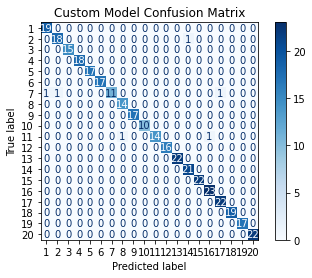

ValueError: multiclass format is not supported

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
import matplotlib.pyplot as plt


class KNearestNeighbours:
    def __init__(self, max_k=20):
        self.max_k = max_k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        # Initialize predictions for all k values
        predictions = {k: [] for k in range(1, self.max_k + 1)}

        for test_point in X_test:
            # Compute distances between the current test point and all training points
            distances = np.linalg.norm(self.X_train - test_point, axis=1)

            # Get sorted indices of distances
            sorted_indices = np.argsort(distances)

            # Retrieve sorted labels of the nearest neighbours
            sorted_labels = self.y_train[sorted_indices]

            # Add weights to the 
            weights = 1 / (distances + 1e-5) 
            for k in range(1, self.max_k + 1):
                k_labels = sorted_labels[:k]
                k_weights = weights[:k]
                weighted_counts = np.bincount(k_labels, weights=k_weights)
                majority_label = weighted_counts.argmax()
                predictions[k].append(majority_label)

        # Convert predictions to arrays
        for k in predictions:
            predictions[k] = np.array(predictions[k])

        return predictions

    def evaluate(self, X_test, y_test):
        # Predict for all k values
        predictions = self.predict(X_test)

        # Evaluate metrics for each k (accuracy, precision score, recall score, f1 score)
        metrics = {}
        for k, preds in predictions.items():
            metrics[k] = {
                "accuracy": accuracy_score(y_test, preds),
                "precision": precision_score(y_test, preds, average='weighted', zero_division=0),
                "recall": recall_score(y_test, preds, average='weighted', zero_division=0),
                "f1_score": f1_score(y_test, preds, average='weighted', zero_division=0)
            }
        return metrics

# Preprocess data
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)

mms = MinMaxScaler().fit(X_train)
X_train, X_test = mms.transform(X_train), mms.transform(X_test)

pca = PCA(n_components=0.90).fit(X_train)  # Retain 90% of variance
X_train, X_test = pca.transform(X_train), pca.transform(X_test)

# Run KNN
knn = KNearestNeighbours(max_k=20)
knn.fit(X_train, y_train)

# Evaluate accuracy for all k values
metrics = knn.evaluate(X_test, y_test)

# Find the best k
best_k = max(metrics, key=lambda k: metrics[k]["accuracy"])
print(f"Best k: {best_k} with Accuracy: {metrics[best_k]['accuracy'] * 100:.2f}%")
print(f"Precision: {metrics[best_k]['precision'] * 100:.2f}%")
print(f"Recall: {metrics[best_k]['recall'] * 100:.2f}%")
print(f"F1 Score: {metrics[best_k]['f1_score'] * 100:.2f}%")


# Predict for all test points
predictions = knn.predict(X_test)

# Get predictions for the best k
best_k_predictions = predictions[best_k]


# Compute the confusion matrix
cm = confusion_matrix(y_test, best_k_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Custom Model Confusion Matrix")
plt.show()

''''
# Compute the precision recall curve
precision, recall, thresholds = precision_recall_curve(y_test, best_k_predictions)
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()
'''